In [7]:
import numpy as np

from stable_baselines3.common.env_checker import check_env
from hem.HEM_v0 import aec_env, parallel_env, sa_env, gym_env
from hem.HEM_v1 import sa_stack_env
import yaml
from hem.env.utils import Renderer
from pettingzoo.test import api_test, parallel_api_test

import supersuit as ss

In [8]:
config_path = 'hem/env/config_env.yaml'
env_config = yaml.safe_load(open(config_path, 'r', encoding='utf-8'))

env_attr = {
    'random_episode_split': False,
    'rolling_episode_split': False,
    'data_start_end': (0, 122 * 24 * 60),  # 数据集中，一共6，7，8，9月，122天，1分钟一个数据点
    'episode_time_steps': int(24 * 60 / env_config['MINUTES_PER_TIME_STEP']),  # one day, 24 hours
    'mode': 'train',
    'random_seed': 1,
    'noise_strength': 0,
    'config_path': config_path,
    'render_mode': 'None',
}

# Testing sa_env

Make env: mode: train, whole_days: 122, train_days: 106, val_days: 16, test_days: 16
Passed Parallel API test
[ 0.0000000e+00  0.0000000e+00  9.9999998e-03  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  1.0000000e+00  0.0000000e+00  9.9999998e-03  0.0000000e+00
  0.0000000e+00  2.2700000e-01  1.8916667e-02  5.7222918e-02
  1.0366296e-01  1.9609577e-03  2.0470913e+01  0.0000000e+00
  1.8778322e+01  0.0000000e+00  0.0000000e+00  7.0000000e+00
 -1.4000000e+00  1.1300000e+01  3.0250001e+00  2.0700000e-01
  1.0000000e+00 -1.4000000e+00  1.1400000e+01  3.0250001e+00
  2.0700000e-01  2.0600000e-01  2.0500000e-01  2.0500000e-01
  7.9999998e-02  1.0000000e+00]
[ 0.0000000e+00  0.0000000e+00  9.9999998e-03  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  1.0000000e+00  0.0000000e+00  9.9999998e-03  0.0000000e+00
  0.0000000e+00  2.2700000e-01  1.8916667e-02  5.7222918e-02
  1.0366296e-01  1.9609577e-03  2.0470913e+01  0.0000000e+00
  1.

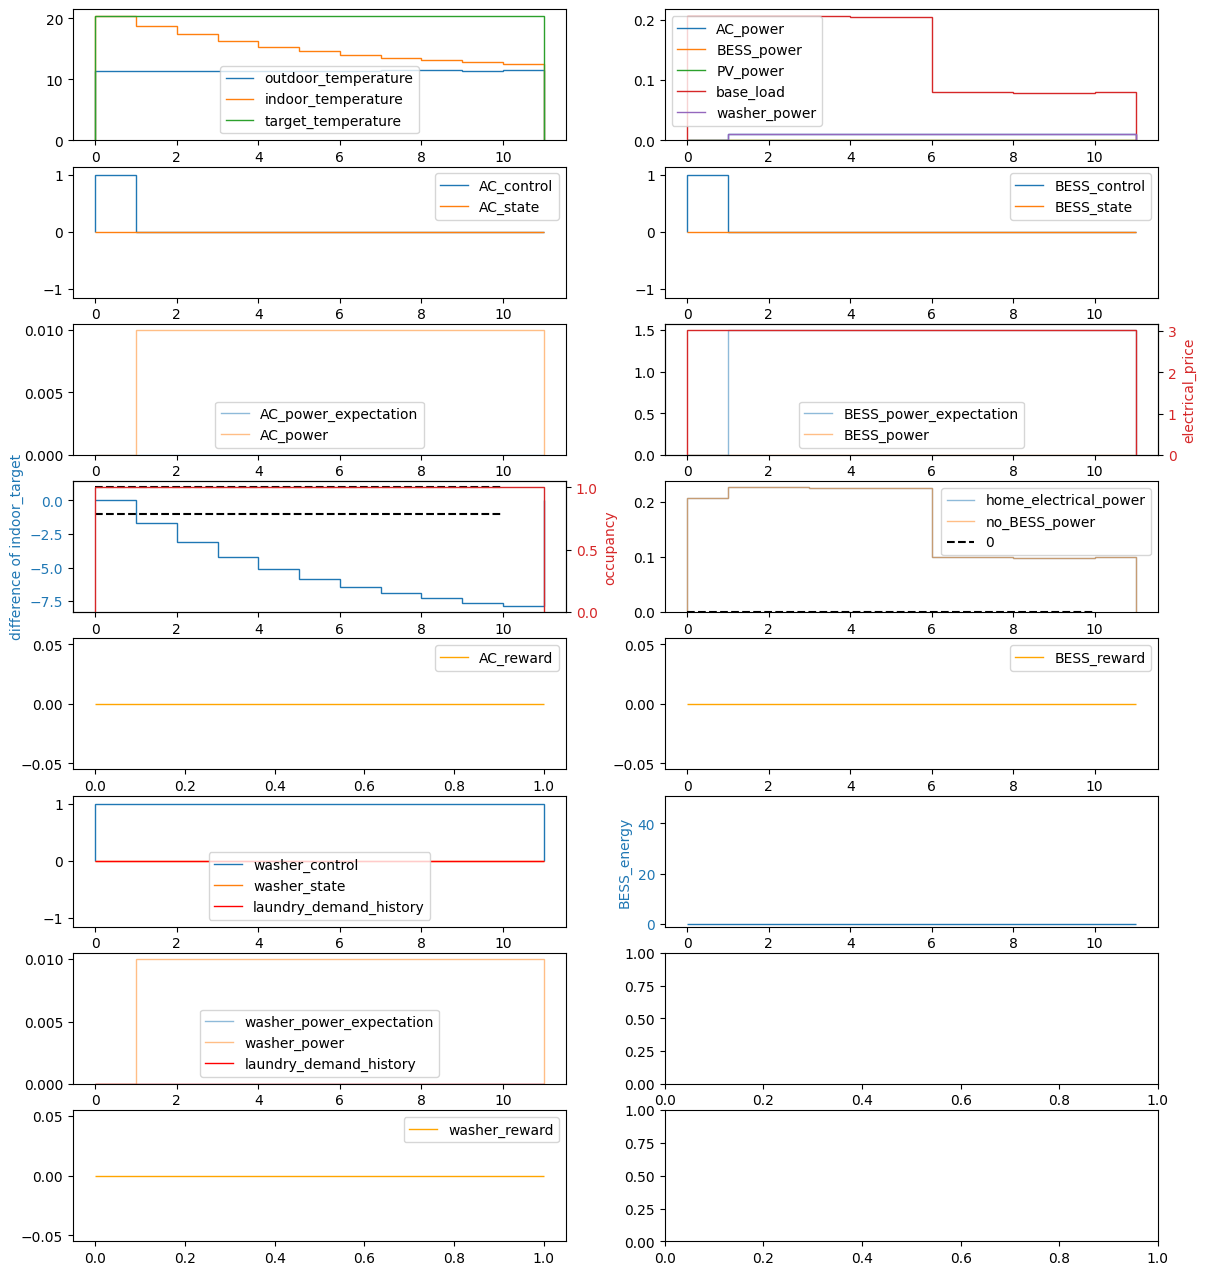

In [9]:
env = sa_env(**env_attr)
parallel_api_test(env, num_cycles=50)

renderer = Renderer(env=env.unwrapped, render_mode='episode')

for e in range(1):
    observation, infos = env.reset()
    terminations = {agent: False for agent in env.agents}
    truncations = {agent: False for agent in env.agents}
    i = 0
    while not any(terminations.values()) and not any(truncations.values()):
        actions = {'BESS': np.array([0, 0, 0, 0, 0, 0])}
        observation, rewards, terminations, truncations, infos = env.step(actions)
        renderer.collect()
        print(observation['BESS'])
        i += 1
        if i == 10:
            break
    renderer.render()
env.close()

# Testing sa_stack_env

Make env: mode: train, whole_days: 122, train_days: 106, val_days: 16, test_days: 16
Passed Parallel API test
(190,)
[0.500005   0.5        0.5        0.500005   0.5        0.5
 0.5        0.5        0.500005   0.5        0.5        0.5
 0.5        0.500001   0.50000006 0.5000003  0.50000054 0.5
 0.50010234 0.5        0.50010234 0.5        0.5        0.500035
 0.499993   0.5000565  0.50001514 0.500001   0.500005   0.499993
 0.500057   0.50001514 0.500001   0.500001   0.500001   0.500001
 0.5000004  0.500005   0.500005   0.5        0.5        0.500005
 0.5        0.5        0.5        0.5        0.500005   0.5
 0.5        0.5        0.5        0.500001   0.50000006 0.5000003
 0.50000054 0.5        0.50010234 0.5        0.50010234 0.5
 0.5        0.500035   0.499993   0.5000565  0.50001514 0.500001
 0.500005   0.499993   0.500057   0.50001514 0.500001   0.500001
 0.500001   0.500001   0.5000004  0.500005   0.500005   0.5
 0.5        0.500005   0.5        0.5        0.5        0.5
 0.5000

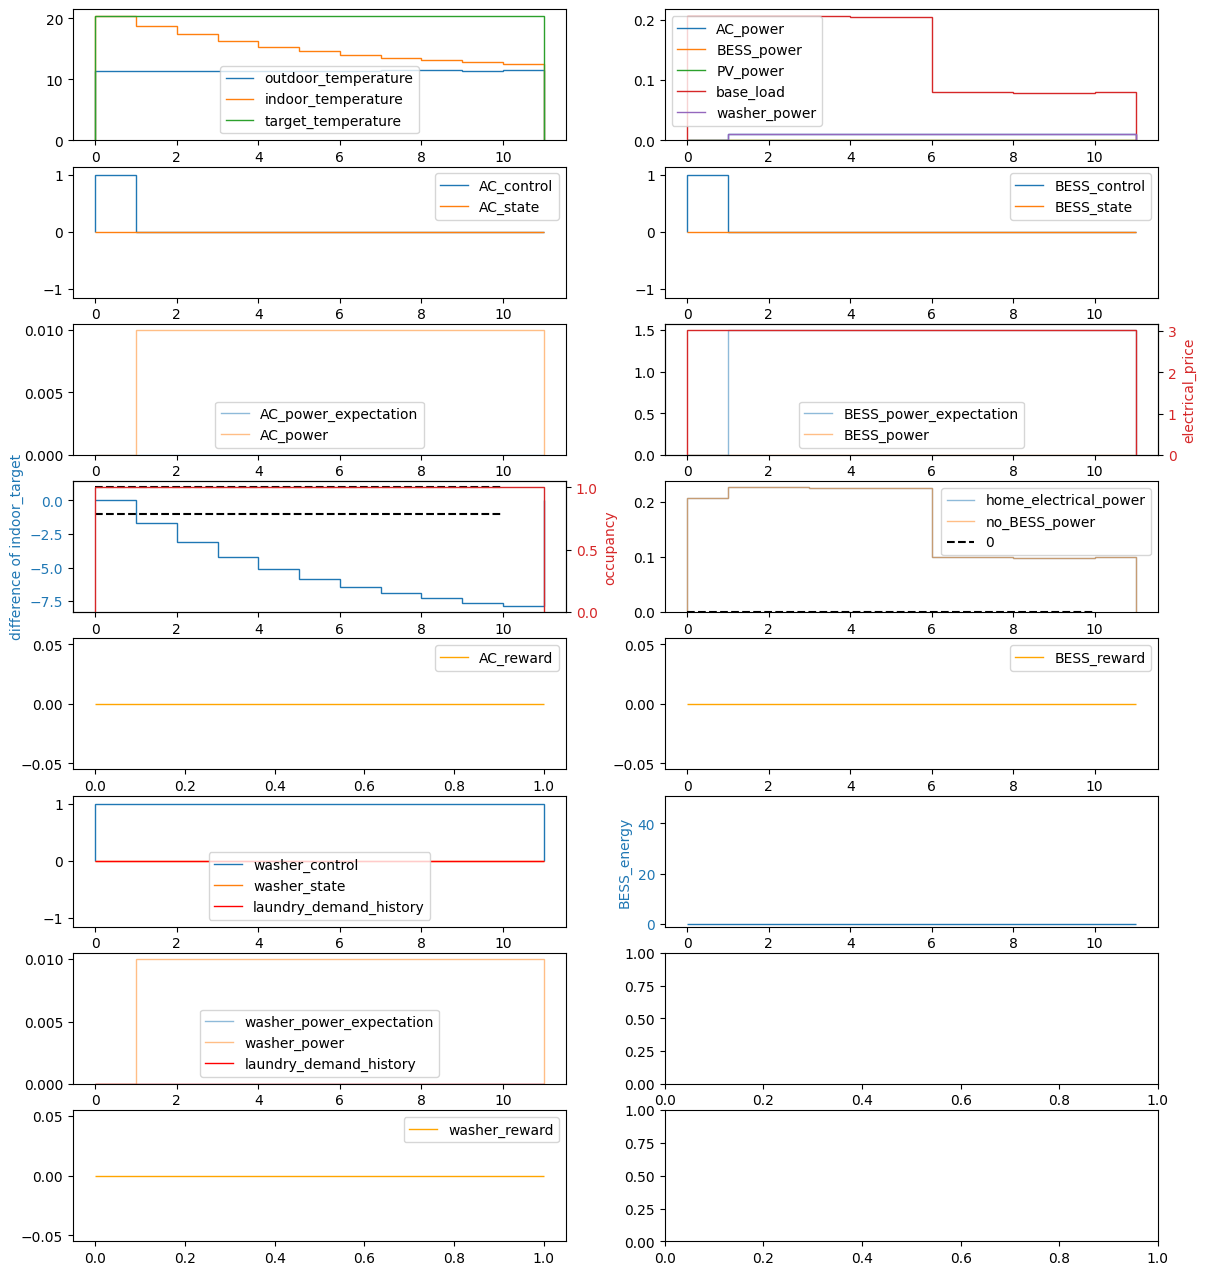

In [10]:
env = sa_stack_env(**env_attr)
parallel_api_test(env, num_cycles=50)

renderer = Renderer(env=env.unwrapped, render_mode='episode')

for e in range(1):
    observation, infos = env.reset()
    terminations = {agent: False for agent in env.agents}
    truncations = {agent: False for agent in env.agents}
    i = 0
    while not any(terminations.values()) and not any(truncations.values()):
        actions = {'BESS': np.array([0, 0, 0, 0, 0, 0])}
        observation, rewards, terminations, truncations, infos = env.step(actions)
        renderer.collect()
        print(observation['BESS'].shape)
        print(observation['BESS'])
        i += 1
        if i == 10:
            break
    renderer.render()
env.close()

In [12]:
# Testing sa_stack_env
env1 = sa_stack_env(**env_attr)
env2 = sa_env(**env_attr)

env1.reset()
# for e in range(1):
#     observation, infos = env1.reset()
#     ob
#     terminations = {agent: False for agent in env.agents}
#     truncations = {agent: False for agent in env.agents}
#     i = 0
#     while not any(terminations.values()) and not any(truncations.values()):
#         actions = {'BESS': np.array([0, 0, 0, 0, 0, 0])}
#         observation, rewards, terminations, truncations, infos = env.step(actions)
#         renderer.collect()
#         print(observation['BESS'].shape)
#         print(observation['BESS'])
#         i += 1
#         if i == 10:
#             break
#     renderer.render()
# env.close()

Make env: mode: train, whole_days: 122, train_days: 106, val_days: 16, test_days: 16
Make env: mode: train, whole_days: 122, train_days: 106, val_days: 16, test_days: 16


({'BESS': array([0.500005  , 0.5       , 0.5       , 0.500005  , 0.5       ,
         0.5       , 0.5       , 0.5       , 0.500005  , 0.5       ,
         0.5       , 0.5       , 0.5       , 0.5000004 , 0.50000006,
         0.5000001 , 0.5000004 , 0.5       , 0.5001229 , 0.5       ,
         0.5001229 , 0.5       , 0.5       , 0.50002   , 0.4999945 ,
         0.500059  , 0.50001514, 0.5000004 , 0.500005  , 0.4999905 ,
         0.50005853, 0.50001514, 0.5000004 , 0.5000004 , 0.5000004 ,
         0.5000004 , 0.5000004 , 0.500005  , 0.500005  , 0.5       ,
         0.5       , 0.500005  , 0.5       , 0.5       , 0.5       ,
         0.5       , 0.500005  , 0.5       , 0.5       , 0.5       ,
         0.5       , 0.5000004 , 0.50000006, 0.5000001 , 0.5000004 ,
         0.5       , 0.5001229 , 0.5       , 0.5001229 , 0.5       ,
         0.5       , 0.50002   , 0.4999945 , 0.500059  , 0.50001514,
         0.5000004 , 0.500005  , 0.4999905 , 0.50005853, 0.50001514,
         0.5000004 , 0.500